In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Reading data

In [2]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/kalapa/data/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/kalapa/data/test.csv')
df_submit = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/kalapa/data/simple_submission.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
c_train = df_train.copy()
c_test = df_test.copy()

c_train['train'] = 1
c_test['train'] = 0
index = df_test['id']
df = pd.concat([c_train, c_test], axis=0, sort=False)

# 2. pre-processing

In [4]:
time_field = [
            'Field_1', 'Field_2', 'Field_3', 'Field_5', 'Field_6', 'Field_7','Field_8',
            'Field_9', 'Field_11', 'Field_15', 'Field_25', 'Field_32', 'Field_33',
            'Field_35', 'Field_40', 'Field_43', 'Field_44', 'ngaySinh',
            'F_startDate', 'F_endDate', 'E_startDate', 'E_endDate', 'C_startDate',
            'C_endDate', 'G_startDate', 'G_endDate', 'A_startDate', 'A_endDate'
]

cat_field = [
            'Field_4',
            'Field_18', 'Field_12', 'Field_34', 'Field_36', 'Field_38', 'Field_45', 'Field_46',
            'Field_47', 'Field_48', 'Field_49', 'Field_54', 'Field_55', 'Field_56', 'Field_61', 'Field_62',
            'Field_65', 'Field_66', 'Field_68', 'gioiTinh', 'diaChi', 'maCv', 
            'info_social_sex', 'data.basic_info.locale', 'currentLocationCity',
            'currentLocationCountry', 'currentLocationName', 'currentLocationState',
            'homeTownCity', 'homeTownCountry', 'homeTownName', 'homeTownState', 'brief'
]

num_field = [col for col in df.columns if col not in time_field+cat_field]
print(num_field)

['id', 'label', 'Field_10', 'Field_13', 'Field_14', 'Field_16', 'Field_17', 'Field_19', 'Field_20', 'Field_21', 'Field_22', 'Field_23', 'Field_24', 'Field_26', 'Field_27', 'Field_28', 'Field_29', 'Field_30', 'Field_31', 'namSinh', 'Field_37', 'Field_39', 'Field_41', 'Field_42', 'Field_50', 'Field_51', 'Field_52', 'Field_53', 'Field_57', 'Field_58', 'Field_59', 'Field_60', 'Field_63', 'Field_64', 'Field_67', 'Field_69', 'Field_70', 'Field_71', 'Field_72', 'Field_73', 'Field_74', 'Field_75', 'Field_76', 'Field_77', 'friendCount', 'subscriberCount', 'currentLocationLocationId', 'currentLocationLatitude', 'currentLocationLongitude', 'homeTownLocationId', 'homeTownLatitude', 'homeTownLongitude', 'topFriends', 'numOrg', 'F_numOrg', 'F_numQuery', 'E_numOrg', 'E_numQuery', 'C_numOrg', 'C_numQuery', 'G_numOrg', 'G_numQuery', 'A_numOrg', 'A_numQuery', 'summary_6m', 'summary_3m', 'summary_1m', 'summary_1w', 'partner0_A', 'partner0_B', 'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F', 'partn

In [5]:
def get_unknown_category(df_train, df_test, cat=cat_field):
    result = pd.DataFrame(columns=['Feature Name', 'Train Unique', 'Test Unique', 'Unknown Value'])
    train_unique = df_train[cat].stack().reset_index(level=0, drop=True)
    train_unique = train_unique.groupby(level=0).unique().reindex(index=df_train[cat].columns)
    test_unique = df_test[cat].stack().reset_index(level=0, drop=True)
    test_unique = test_unique.groupby(level=0).unique().reindex(index=df_test[cat].columns)
    for index, feat in enumerate(cat):
        a = test_unique.loc[feat]
        u1 = train_unique.loc[feat]
        u2 = test_unique.loc[feat]
        unknown = np.where(~np.in1d(u2, u2))[0]
        result.loc[index] = [feat, len(u1), len(u2), len(unknown)]
    return result

In [6]:
result = get_unknown_category(df_train.astype(str), df_test.astype(str))
result

,Feature Name,Train Unique,Test Unique,Unknown Value
0,Field_4,3,3,0
1,Field_18,6588,2660,0
2,Field_12,8,8,0
3,Field_34,2636,1908,0
4,Field_36,35,30,0
5,Field_38,7,6,0
6,Field_45,10958,5439,0
7,Field_46,14312,6553,0
8,Field_47,6,6,0
9,Field_48,12651,5901,0


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,73411,NaN,NaN,NaN,36705,21192.1,0,18352.5,36705,55057.5,73410
label,53030,NaN,NaN,NaN,0.316726,0.465204,0,0,0,1,1
Field_1,34624,28806,2017-03-24T20:10:37.62Z,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Field_2,34624,24268,2017-03-24T20:10:37.62Z,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Field_3,34624,NaN,NaN,NaN,1.53596,0.498713,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
Field_79,38533,NaN,NaN,NaN,34.6264,40.1541,0,5.65685,17.0392,52.3068,359.917
Field_80,49880,NaN,NaN,NaN,-4.83718,36.4411,-303,-8.33929,1.55,8.5,238
Field_81,49450,NaN,NaN,NaN,-39.8967,70.9605,-332,-89,0,1,238
Field_82,73411,NaN,NaN,NaN,1.6965,1.09638,1,1,1,2,4


## 2.1. Missing Values

In [8]:
def missing_value(df):
    mis_val = df.isnull().sum()
    mis_val_per = 100 * df.isnull().sum() / len(df)
    mis_val_tab = pd.concat([mis_val, mis_val_per], axis=1)
    mis_val_re  = mis_val_tab.rename(columns={
        0: 'Miss',
        1: 'Per'
    })
    mis_val_re = mis_val_re[mis_val_re.iloc[:, 1] !=0].sort_values('Per', ascending=False).round(1)
    print("Có tất cả " + str(df.shape[1]) + " cột.\n"
          "Trog đó có " + str(mis_val_re.shape[0]) + " cột bị thiếu data")
    return mis_val_re

In [9]:
missing = missing_value(df)
missing

Có tất cả 196 cột.
Trog đó có 193 cột bị thiếu data


,Miss,Per
Field_35,64202,87.5
Field_12,63489,86.5
Field_11,63438,86.4
Field_18,62005,84.5
maCv,61029,83.1
...,...,...
partner1_L,7395,10.1
partner1_K,7395,10.1
partner3_A,7395,10.1
num_of_phone,3200,4.4


In [10]:
print(df['label'].value_counts())

0.0    36234
1.0    16796
Name: label, dtype: int64


In [11]:
def infomation(df):
    x, y = df
    if x != x and y != y:
        return 'nan'
    if x != x:
        return y.lower()
    return x.lower()

df["sex"] = df[['gioiTinh', 'info_social_sex']].apply(infomation, axis=1).astype('object')

drop = ['Field_14', 'Field_16', 'Field_17', 'Field_24', 'Field_26', 'Field_30', 'Field_31', 'Field_37', 'Field_52',
        'Field_57', 'partner0_B', 'partner0_K', 'partner0_L', 'partner1_B', 'partner1_D', 'partner1_E', 'partner1_F',
        'partner1_K', 'partner1_L', 'partner2_B', 'partner2_G', 'partner2_K', 'partner2_L', 'partner3_B', 'partner3_F',
        'partner3_G', 'partner3_H', 'partner3_K', 'partner3_L', 'partner4_A', 'partner4_B', 'partner4_C', 'partner4_D',
        'partner4_E', 'partner4_F', 'partner4_G', 'partner4_H', 'partner4_K', 'partner4_L', 'partner5_B', 'partner5_C',
        'partner5_H', 'partner5_K', 'partner5_L', 'Field_34', 'gioiTinh', 'info_social_sex', 'data.basic_info.locale', 'homeTownCountry',
        'Field_2', 'Field_5', 'Field_49', 'Field_9', 'ngaySinh', 'namSinh', 'Field_10', 'Field_13', 'Field_21', 
        'Field_22', 'Field_38','Field_41', 'Field_42','Field_50', 'Field_53', 'Field_62', 'currentLocationLongitude', 'homeTownLongitude',
        'E_numQuery', 'C_numOrg', 'C_numQuery', 'G_numQuery', 'A_numQuery', 'summary_6m',
        'summary_3m', 'summary_1m', 'summary_1w', 'partner0_C', 'partner0_D', 'partner0_E',
        'partner0_F', 'partner0_H', 'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A',
        'partner2_C', 'partner2_D', 'partner2_E', 'partner2_H', 'partner3_C', 'partner3_E',
        'partner5_D', 'partner5_E', 'partner5_F', 'partner5_G', 'num_of_phone',
        'Field_51', 'Field_73','partner2_F', 'Field_35', 'Field_11', 'Field_15',
        'Field_1', 'Field_6', 'Field_7', 'Field_8', 'Field_25', 
        'Field_33', 'Field_40', 'Field_43', 'Field_44', 'Field_18',
        'F_startDate', 'F_endDate', 'E_startDate', 'E_endDate', 'C_startDate', 'C_endDate', 'G_startDate',
        'G_endDate', 'A_startDate', 'A_endDate','Field_4', 'Field_12', 'Field_45', 'Field_36', 'Field_54', 'Field_55', 'Field_66', 
        'Field_68', 'currentLocationState', 'homeTownCity', 'homeTownName', 'homeTownState', 'Field_32']

df = df.drop(drop, axis=1)

In [12]:
df.shape

(73411, 62)

In [13]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Trong cột " + str(col_name) + " có " + str(unique_cat) + " biến object")

Trong cột diaChi có 27702 biến object
Trong cột Field_46 có 17903 biến object
Trong cột Field_47 có 6 biến object
Trong cột Field_48 có 15761 biến object
Trong cột Field_56 có 1516 biến object
Trong cột Field_61 có 37 biến object
Trong cột Field_65 có 11 biến object
Trong cột maCv có 4547 biến object
Trong cột currentLocationCity có 1021 biến object
Trong cột currentLocationCountry có 52 biến object
Trong cột currentLocationName có 1276 biến object
Trong cột brief có 21 biến object
Trong cột sex có 3 biến object


In [14]:
df = df.drop(columns=['diaChi', 'Field_46', 'Field_48', 'Field_56', 'currentLocationCity', 'maCv', 'currentLocationName'], axis=1)


In [15]:
df.shape

(73411, 55)

In [16]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Trong cột " + str(col_name) + " có " + str(unique_cat) + " biến object")

Trong cột Field_47 có 6 biến object
Trong cột Field_61 có 37 biến object
Trong cột Field_65 có 11 biến object
Trong cột currentLocationCountry có 52 biến object
Trong cột brief có 21 biến object
Trong cột sex có 3 biến object


In [17]:
todummy_list = ['Field_47', 'Field_61', 'Field_65', 'currentLocationCountry', 'brief', 'sex']

In [18]:
def dummy_df(df, todummy_df):
    for i in todummy_list:
        dummies = pd.get_dummies(df[i], prefix=i, dummy_na=False)
        df = df.drop(i, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [19]:
df = dummy_df(df, todummy_list)

In [20]:
print(df.head(10))

   id  label  Field_3  Field_19  ...  brief_notfound  sex_female  sex_male  sex_nan
0   0    1.0      1.0       0.0  ...               0           0         1        0
1   1    0.0      NaN       NaN  ...               0           0         0        1
2   2    0.0      2.0       0.0  ...               0           1         0        0
3   3    0.0      NaN       NaN  ...               0           0         0        1
4   4    1.0      NaN       NaN  ...               0           0         0        1
5   5    0.0      NaN       NaN  ...               0           0         0        1
6   6    0.0      2.0       0.0  ...               0           1         0        0
7   7    1.0      2.0       0.0  ...               1           0         1        0
8   8    0.0      1.0       0.0  ...               0           1         0        0
9   9    0.0      NaN       NaN  ...               0           0         0        1

[10 rows x 174 columns]


## 2.2 Handling Mising Values

In [21]:
miss = missing_value(df)
miss

Có tất cả 174 cột.
Trog đó có 46 cột bị thiếu data


,Miss,Per
Field_74,44993,61.3
topFriends,44841,61.1
Field_75,41055,55.9
Field_76,41055,55.9
Field_77,41055,55.9
Field_64,40681,55.4
friendCount,40229,54.8
currentLocationLocationId,40229,54.8
subscriberCount,40229,54.8
currentLocationLatitude,40229,54.8


In [22]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 7.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [23]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df), columns=df.columns)

In [24]:
missing = missing_value(df)
missing

Có tất cả 174 cột.
Trog đó có 0 cột bị thiếu data


,Miss,Per


In [26]:
df.dtypes

id                float64
label             float64
Field_3           float64
Field_19          float64
Field_20          float64
                   ...   
brief_cb3         float64
brief_notfound    float64
sex_female        float64
sex_male          float64
sex_nan           float64
Length: 174, dtype: object

## 2.3 Distributions of Feature

In [34]:
def plot_histogram(df):
    plt.hist(df, color='gray', alpha=0.5)
    plt.title(("Histogram of {var_name}").format(var_name=df.name))
    plt.xlabel('value')
    plt.ylabel('Frequency')
    plt.show()

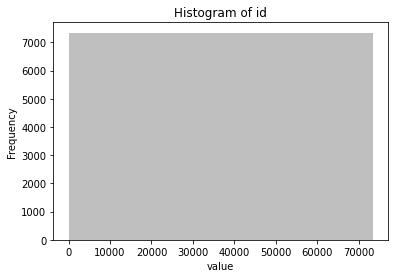

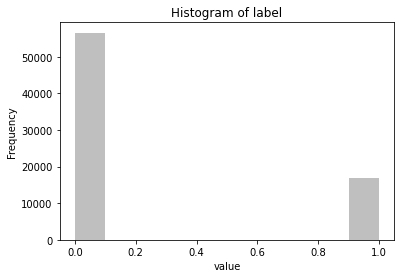

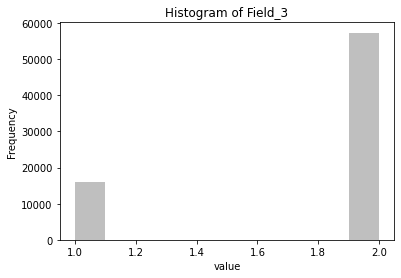

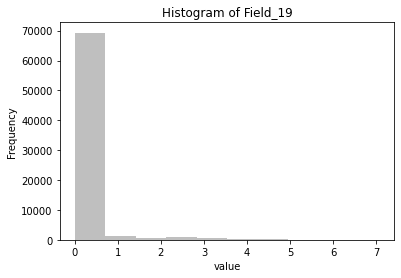

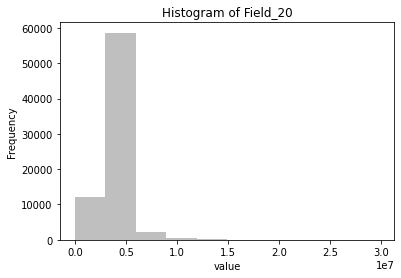

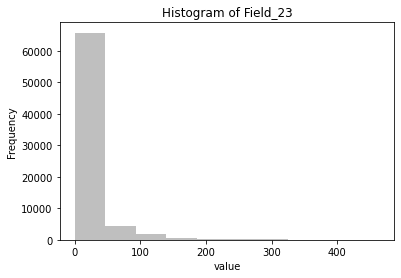

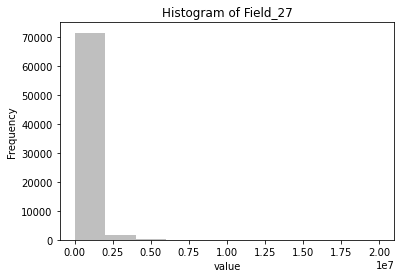

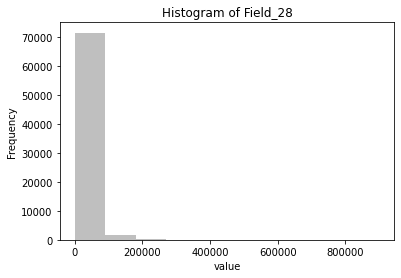

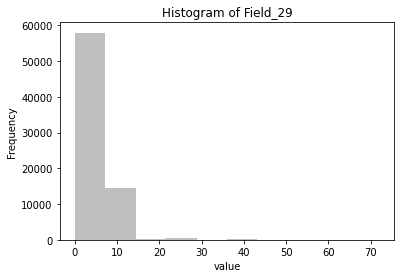

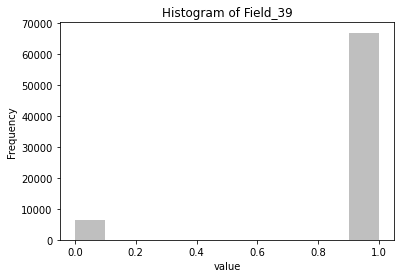

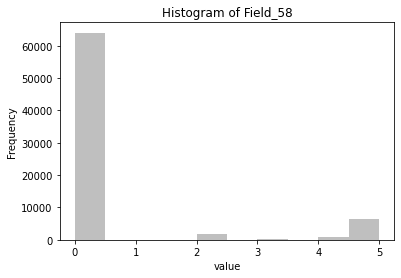

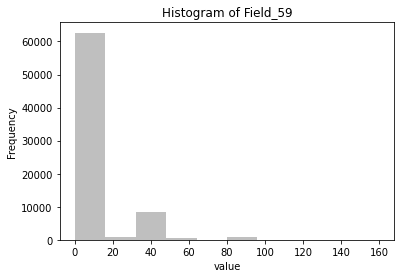

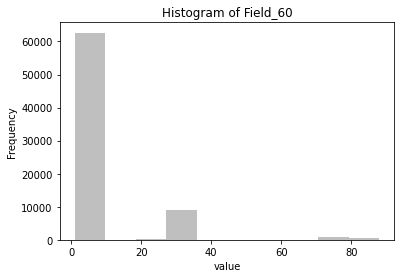

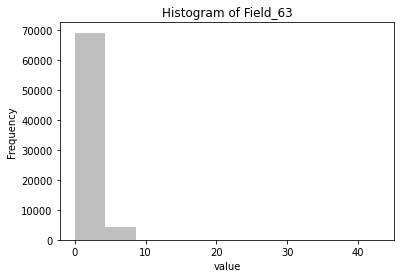

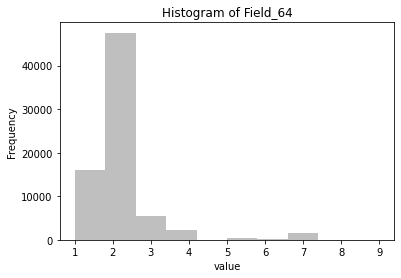

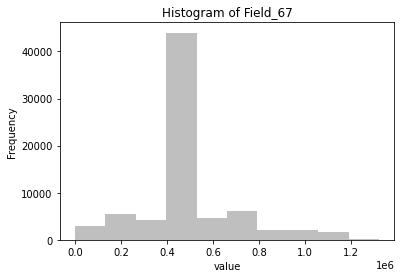

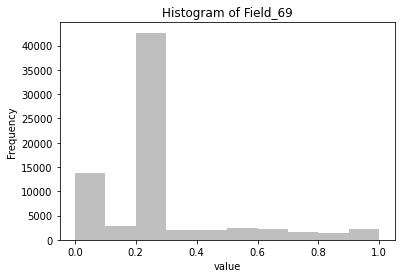

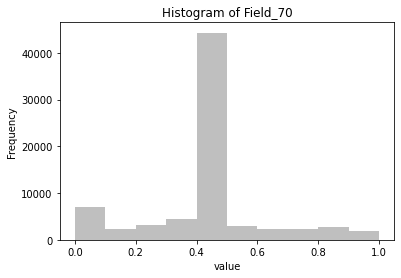

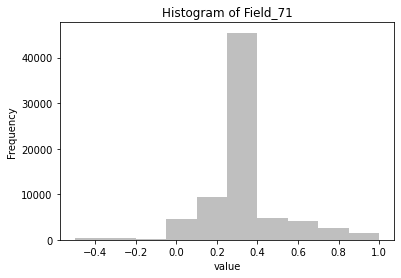

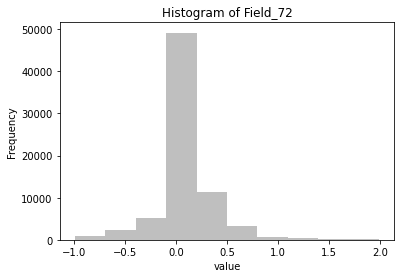

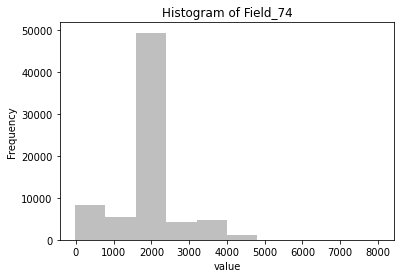

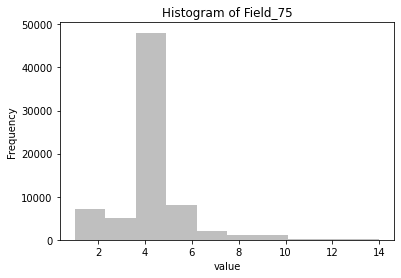

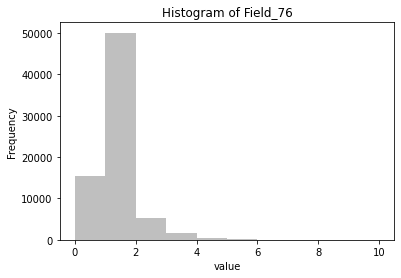

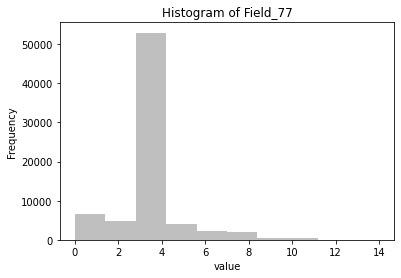

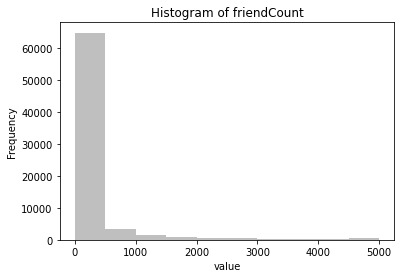

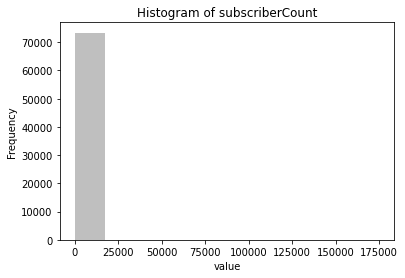

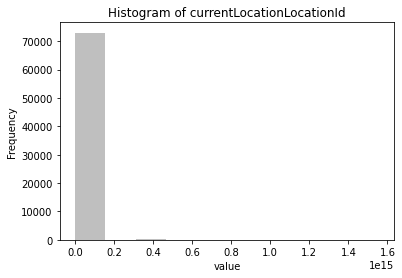

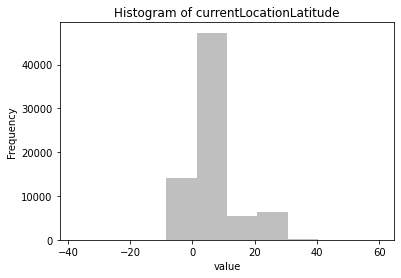

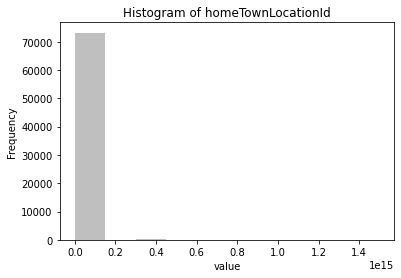

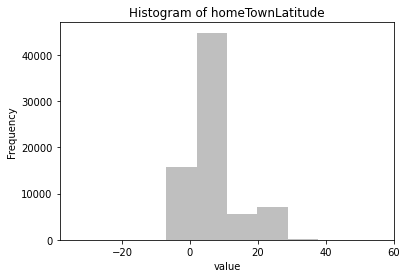

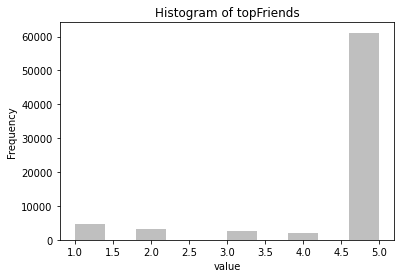

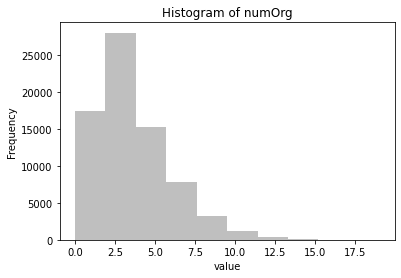

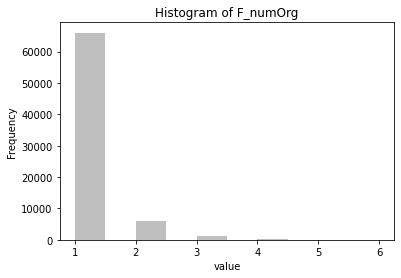

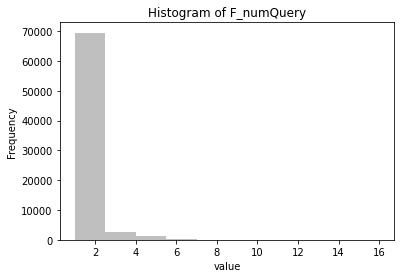

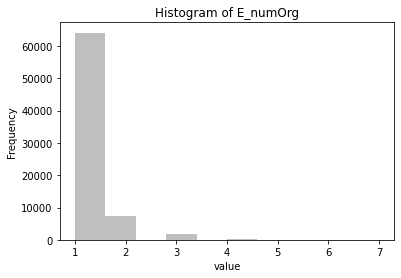

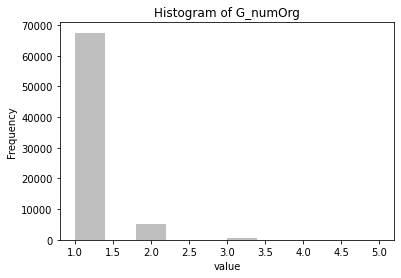

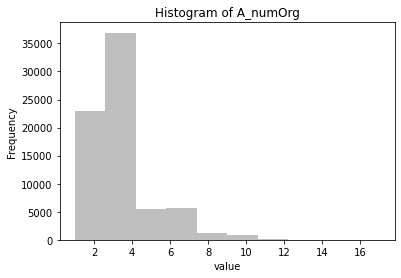

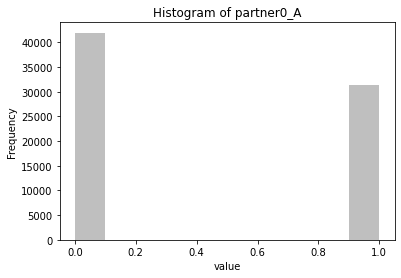

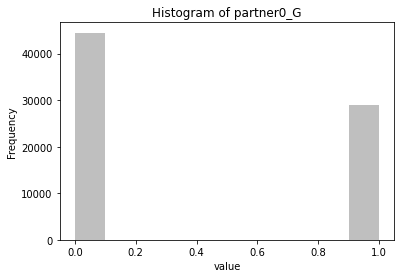

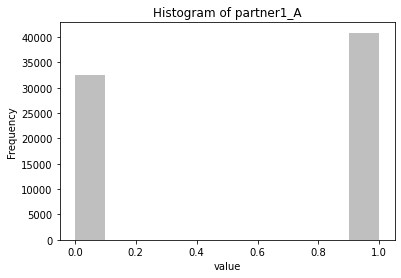

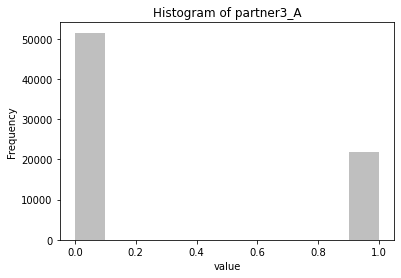

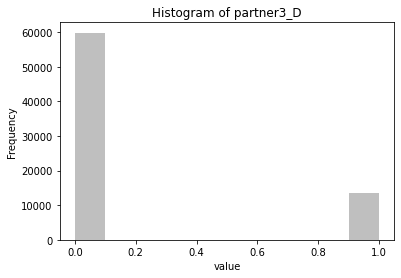

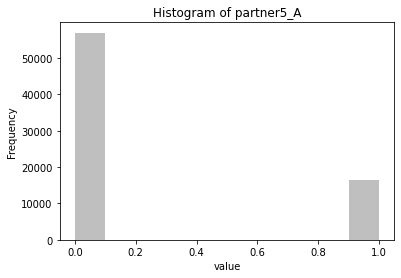

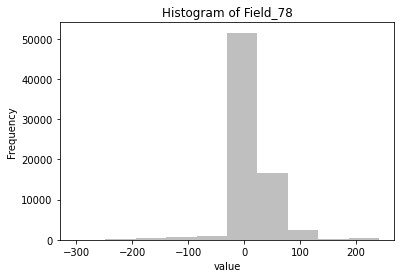

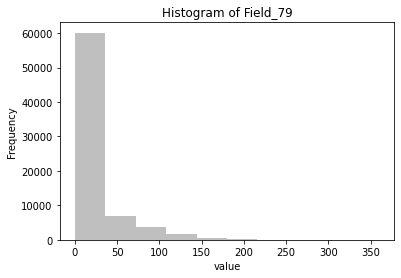

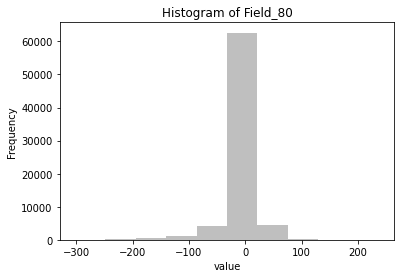

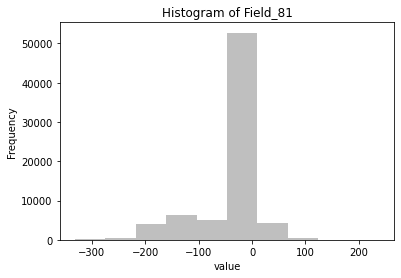

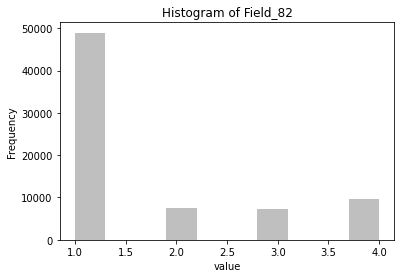

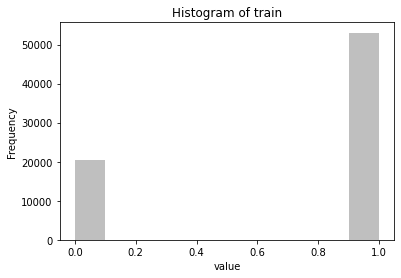

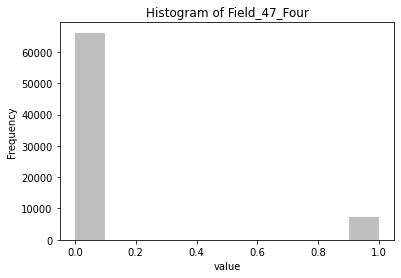

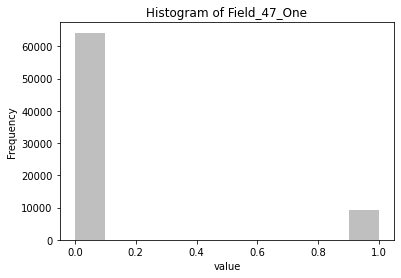

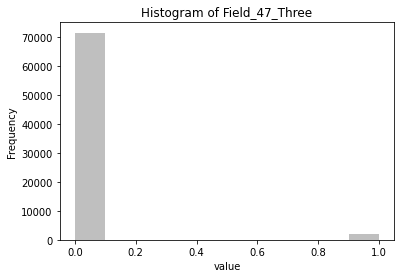

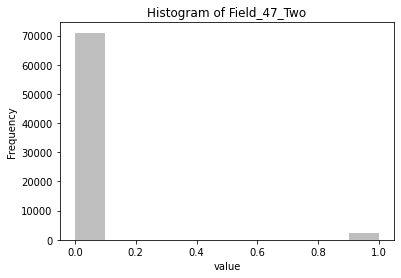

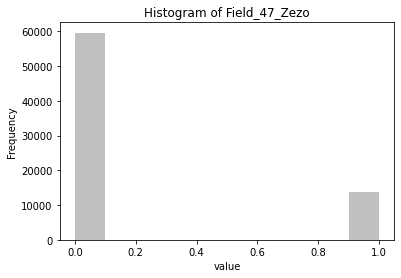

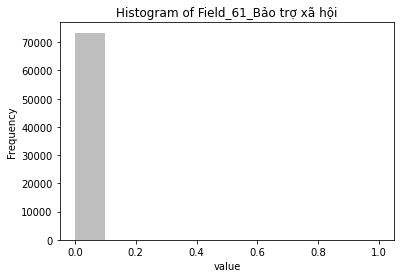

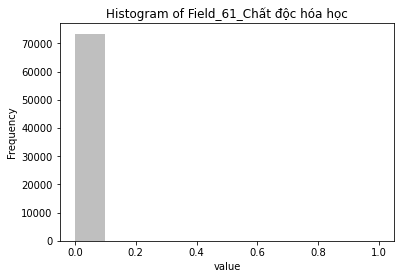

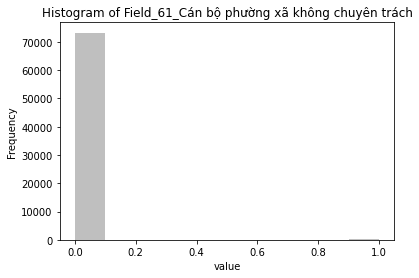

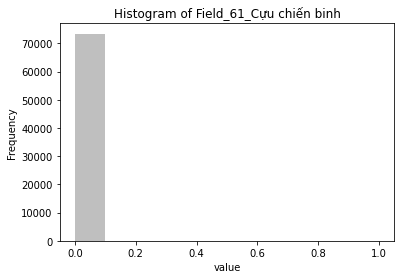

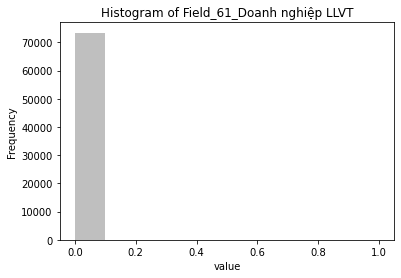

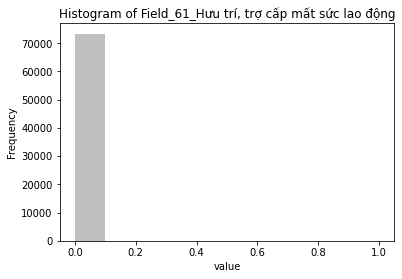

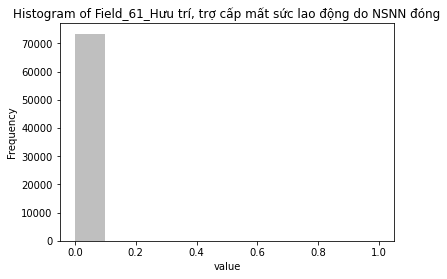

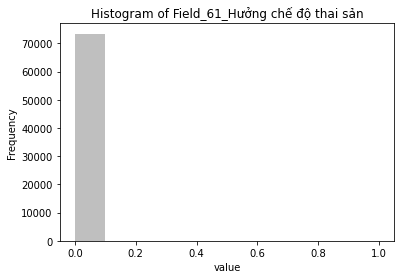

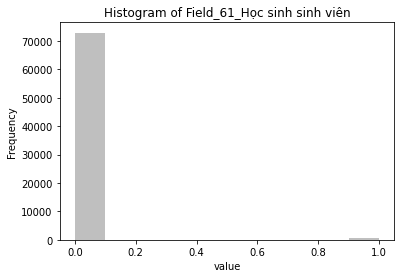

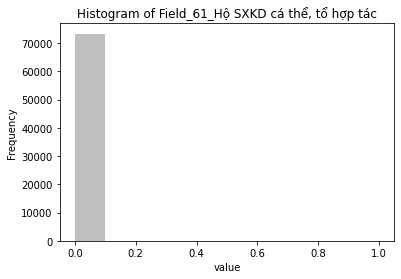

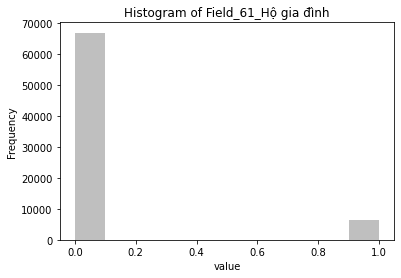

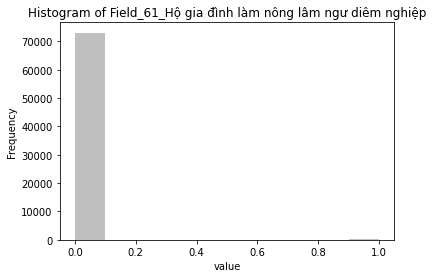

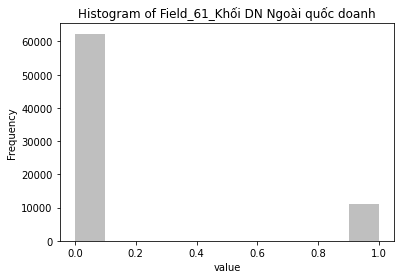

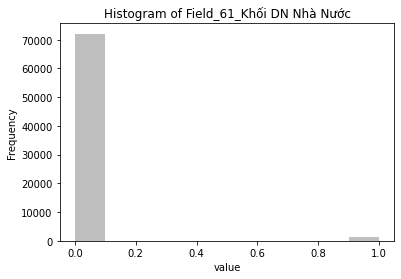

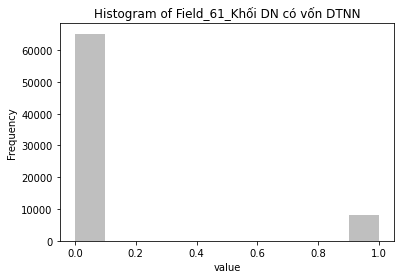

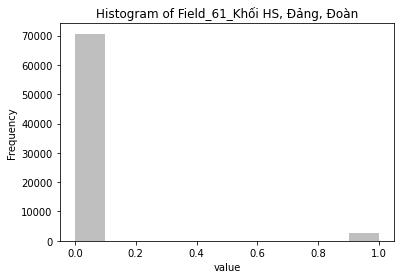

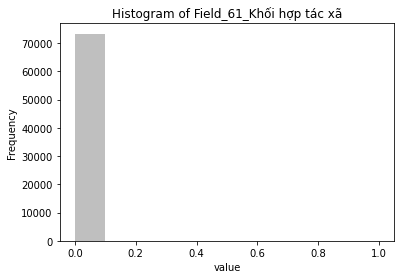

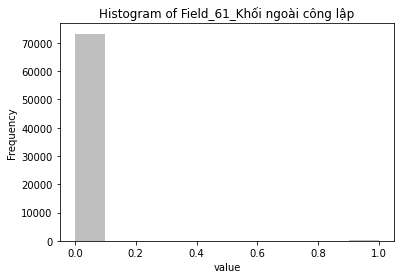

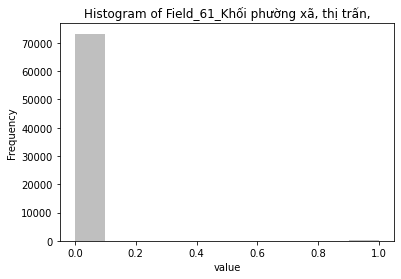

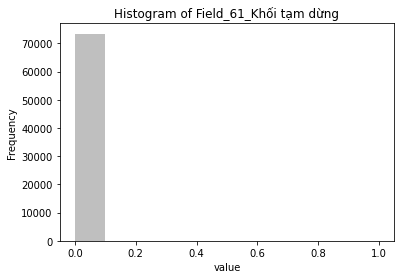

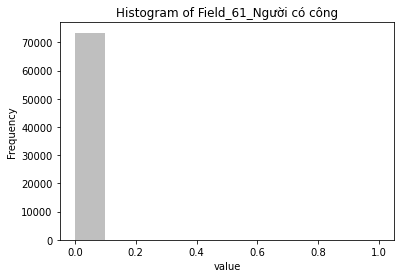

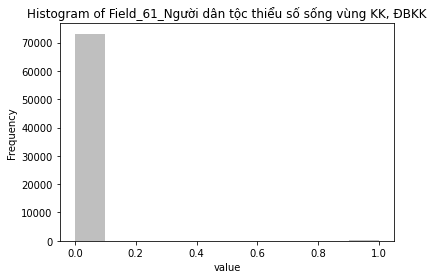

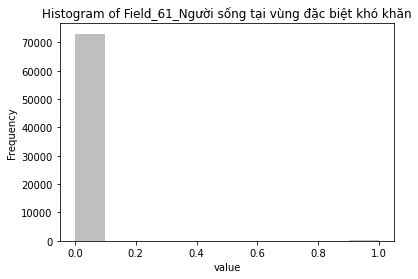

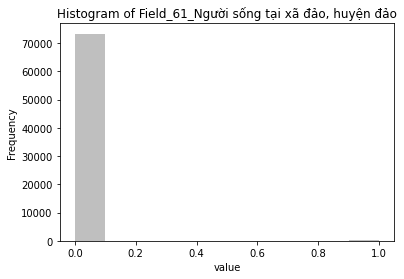

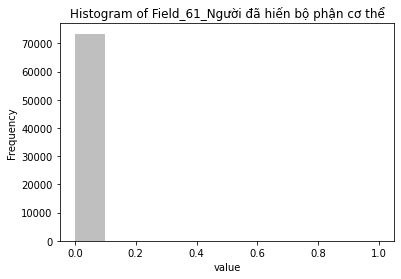

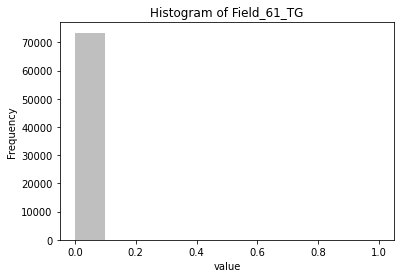

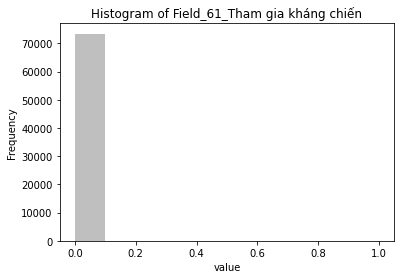

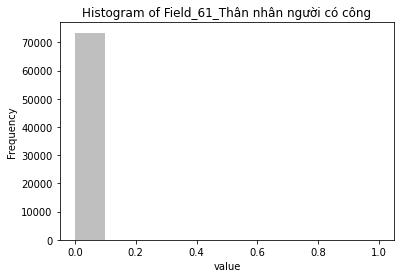

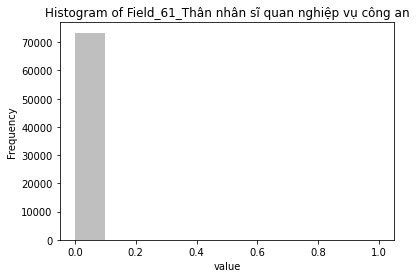

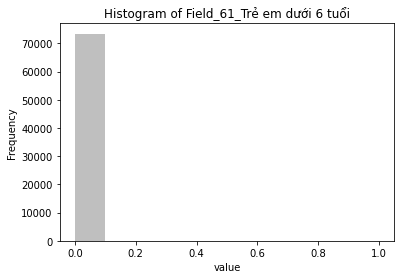

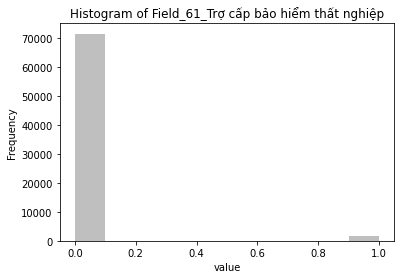

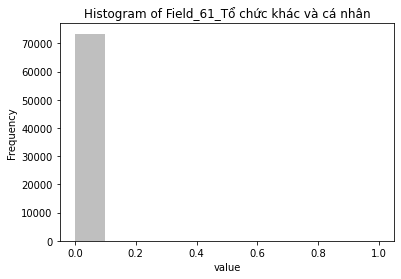

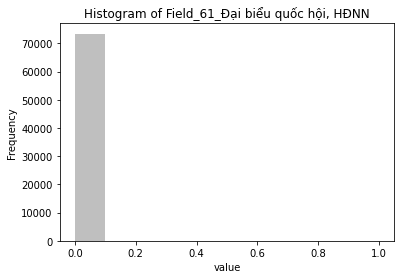

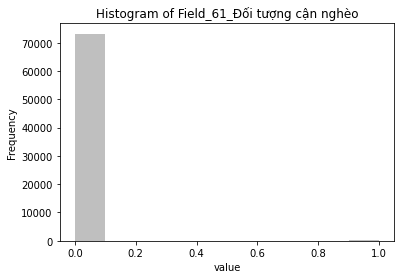

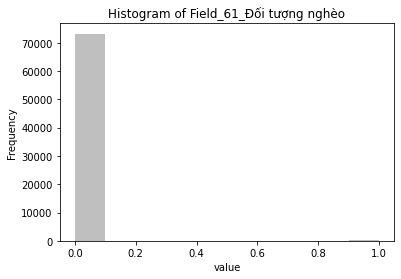

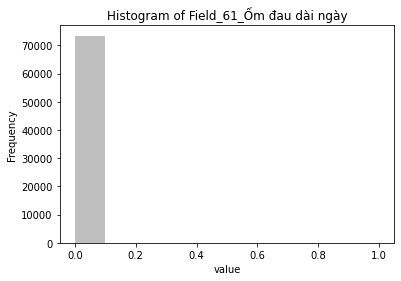

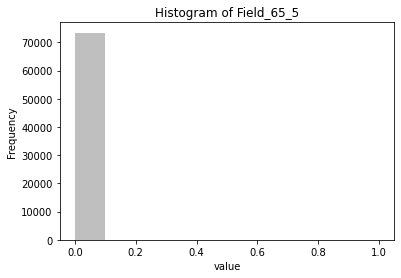

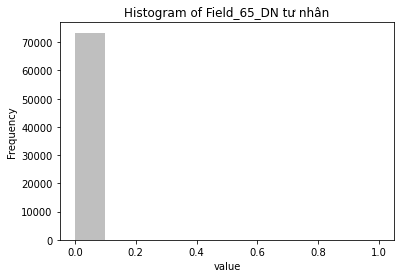

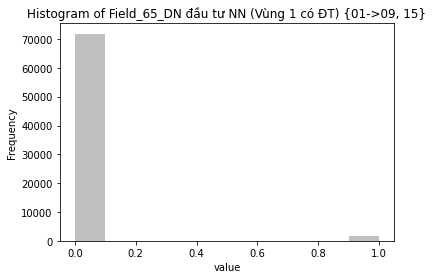

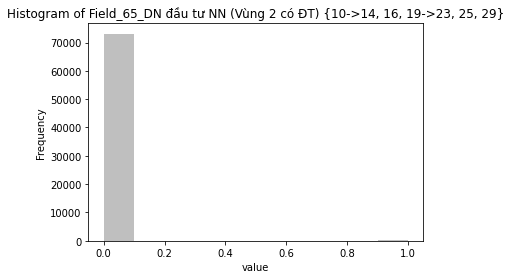

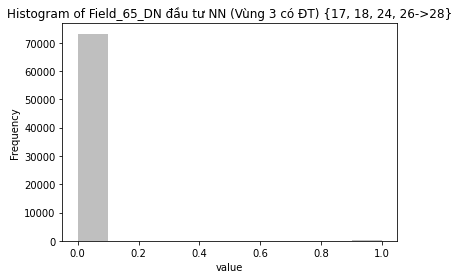

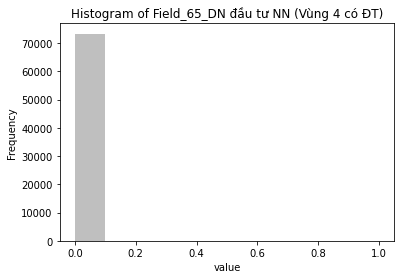

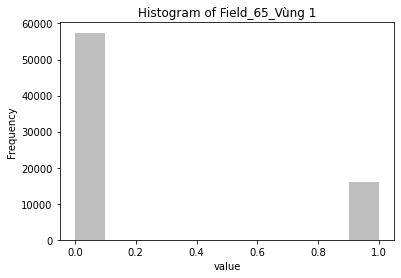

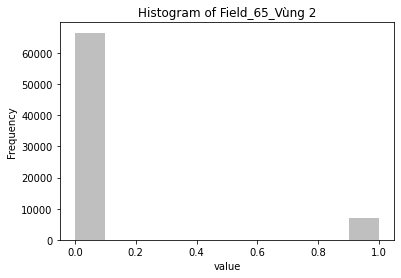

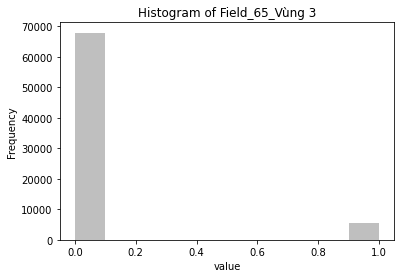

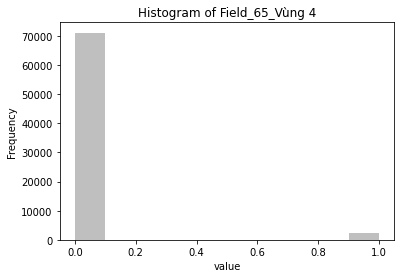

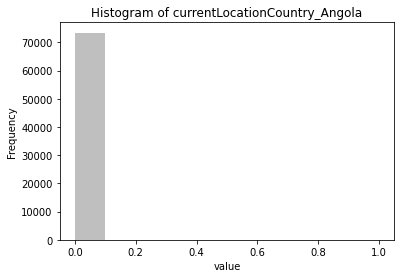

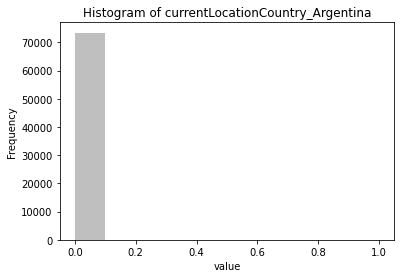

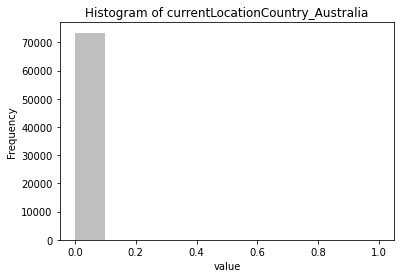

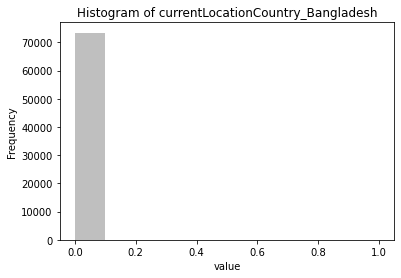

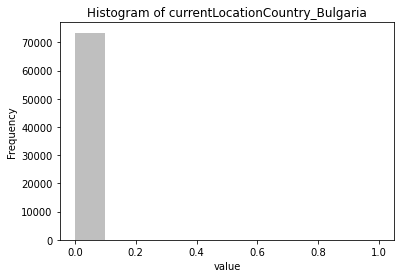

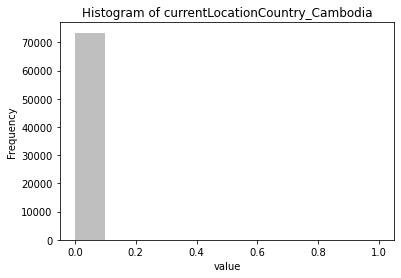

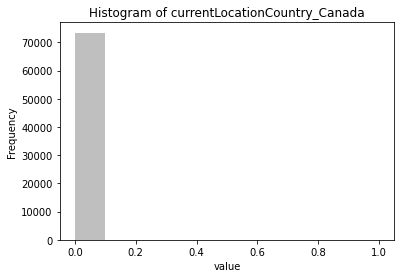

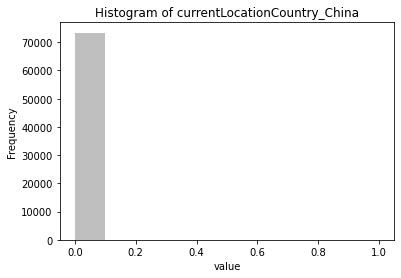

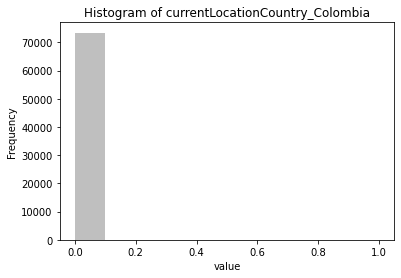

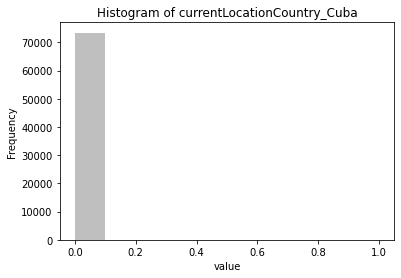

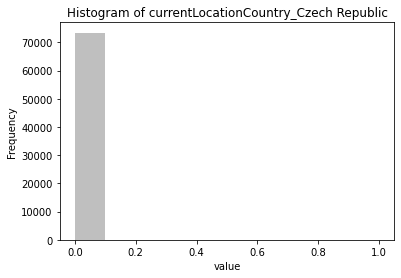

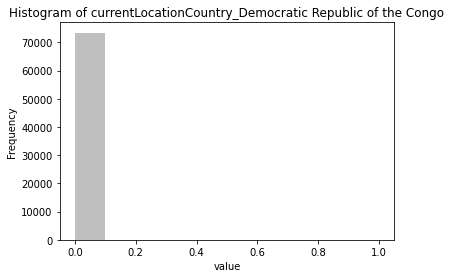

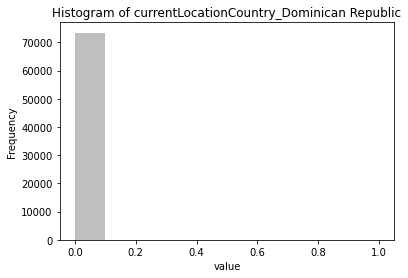

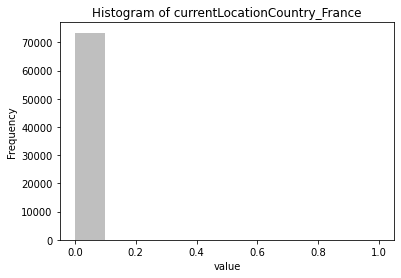

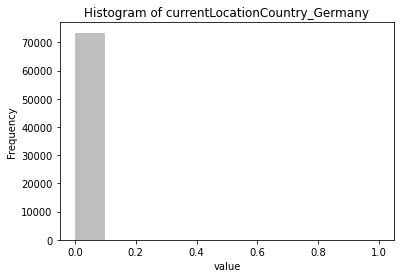

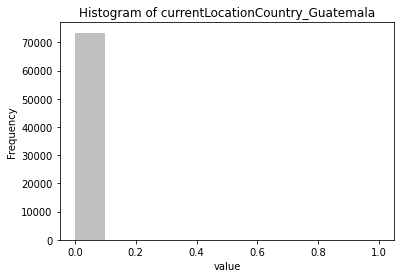

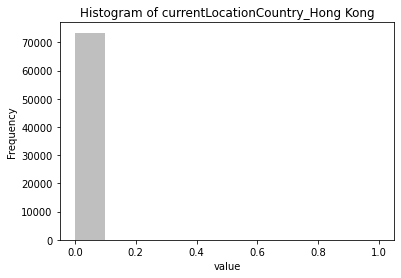

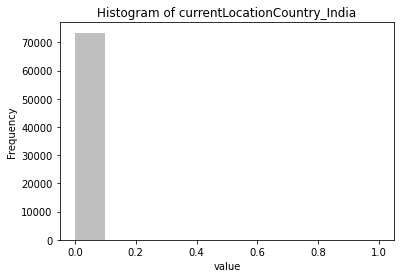

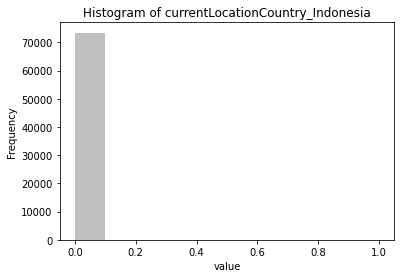

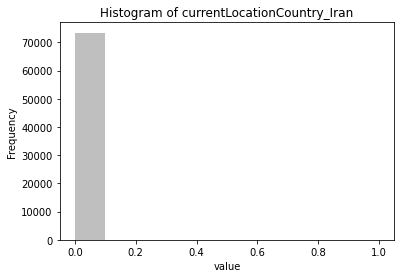

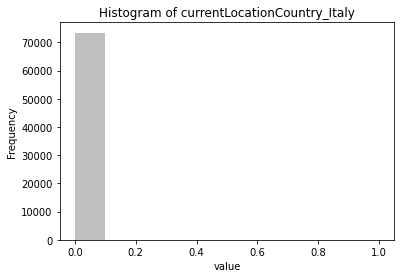

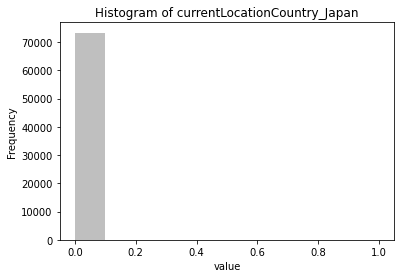

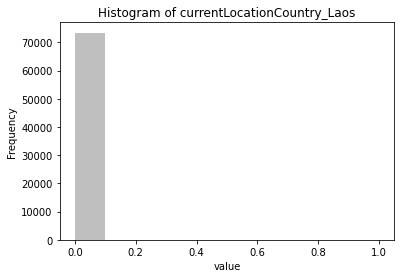

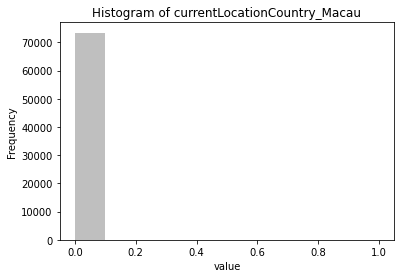

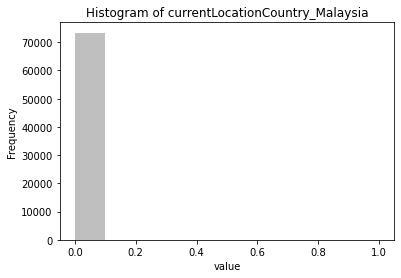

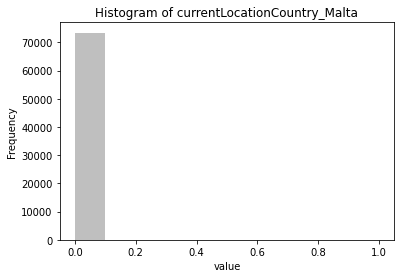

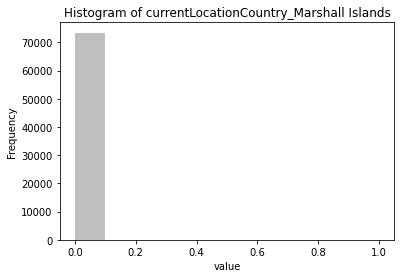

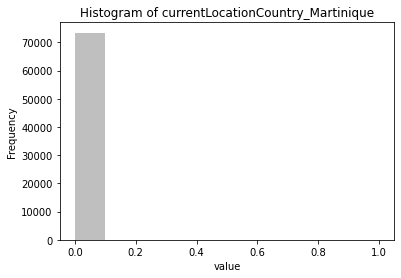

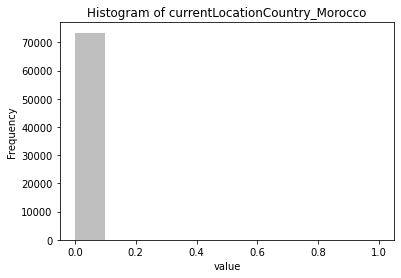

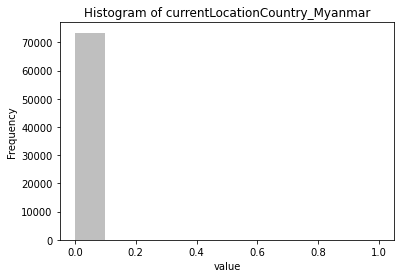

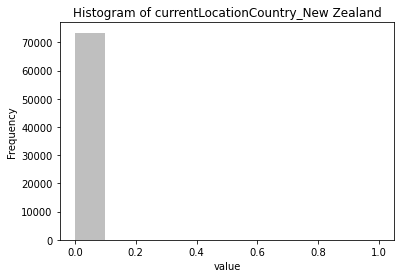

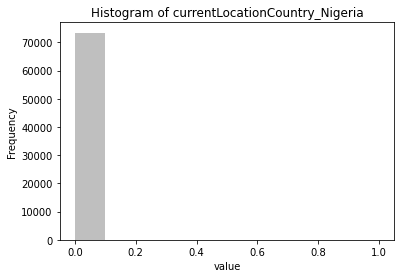

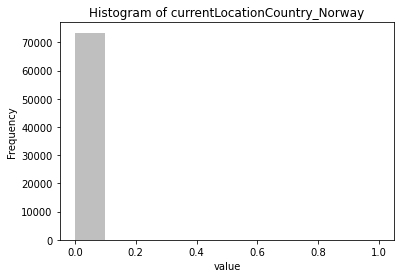

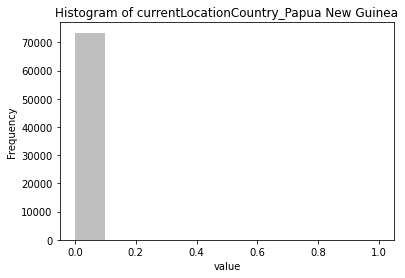

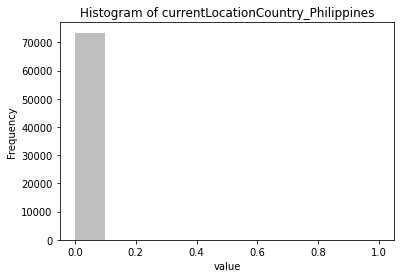

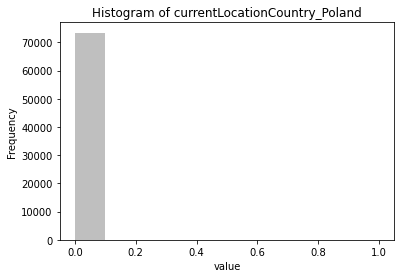

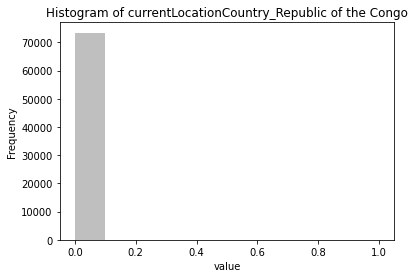

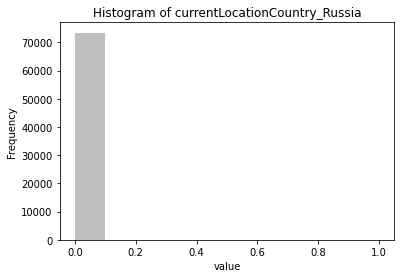

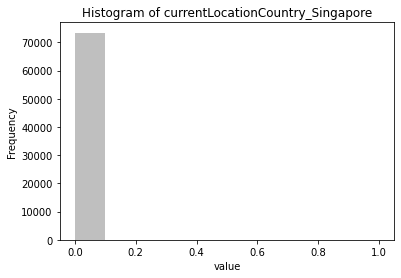

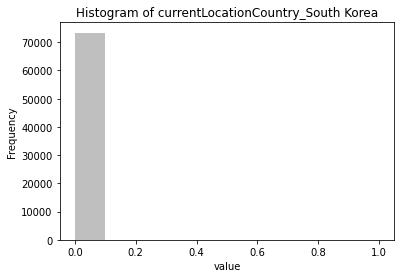

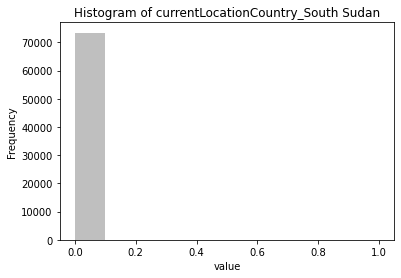

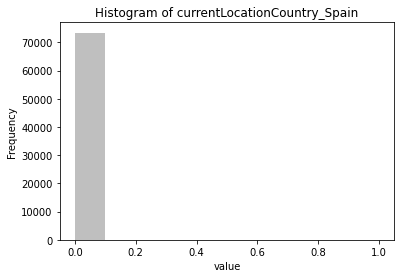

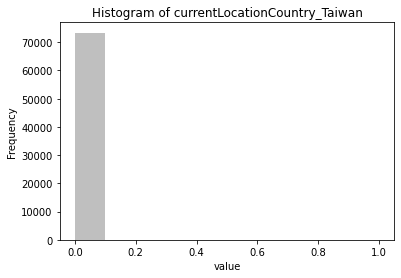

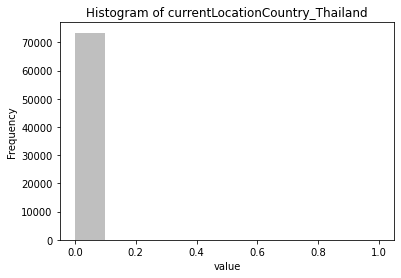

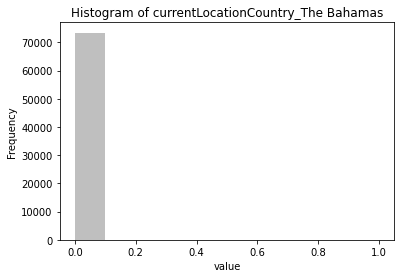

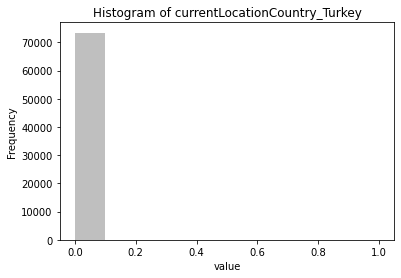

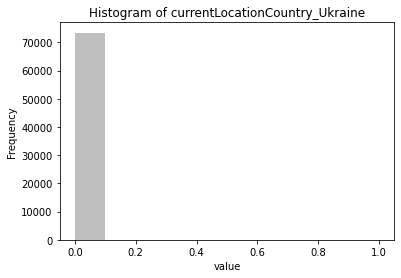

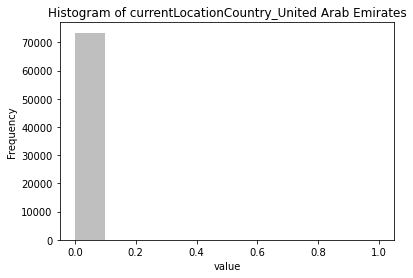

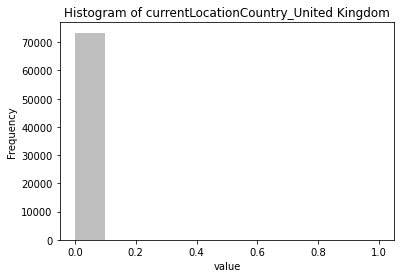

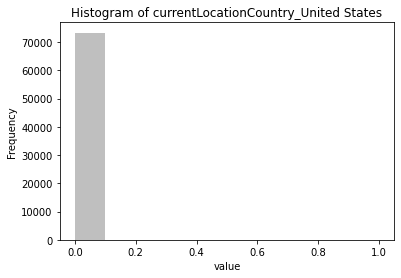

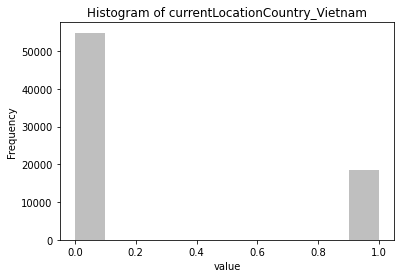

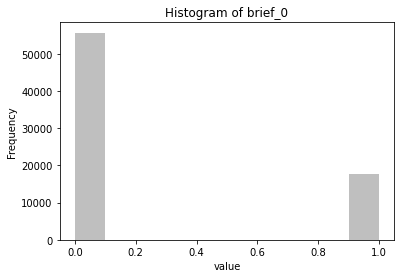

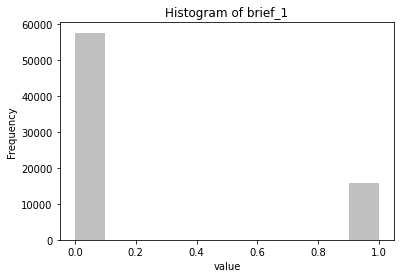

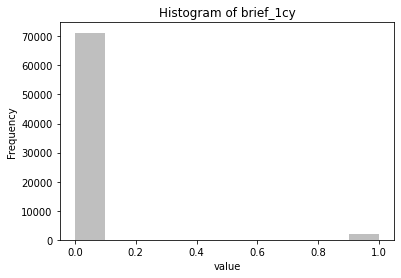

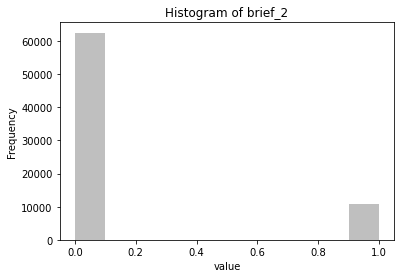

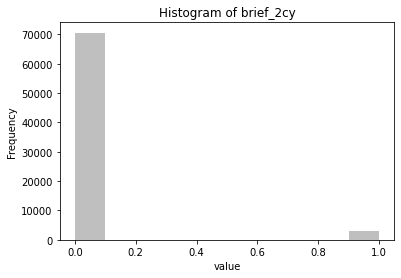

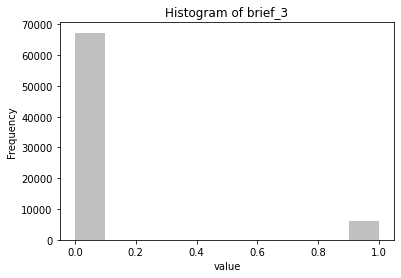

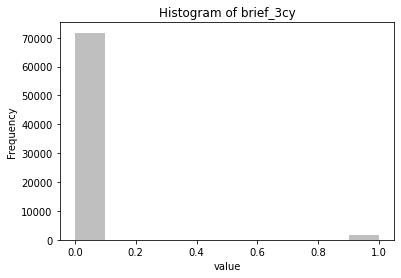

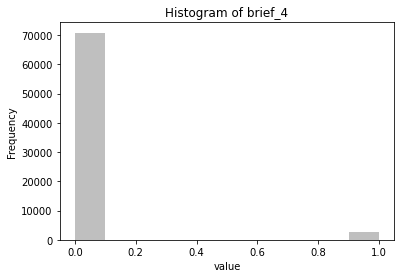

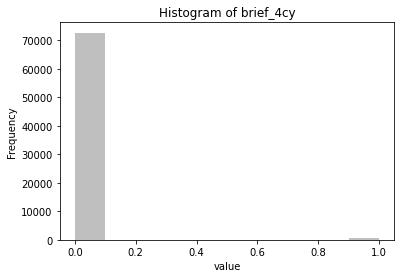

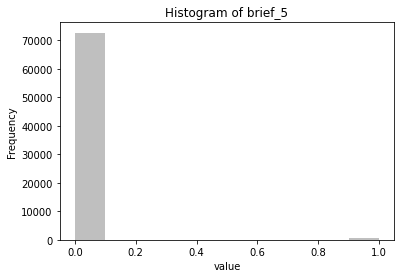

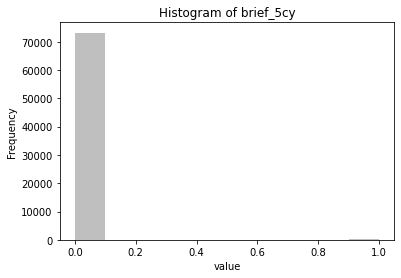

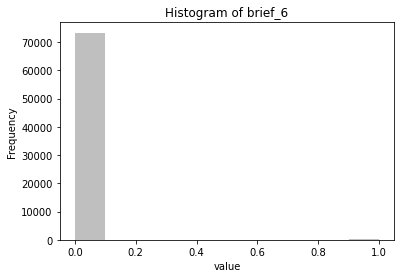

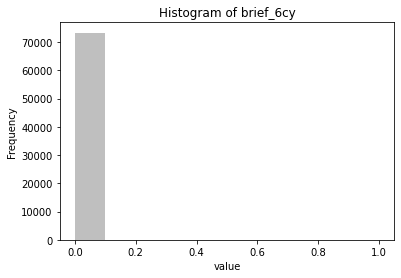

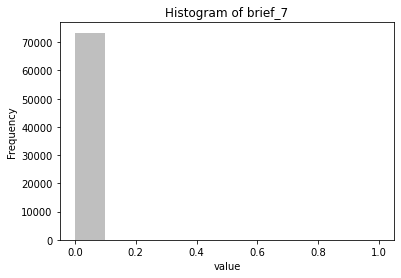

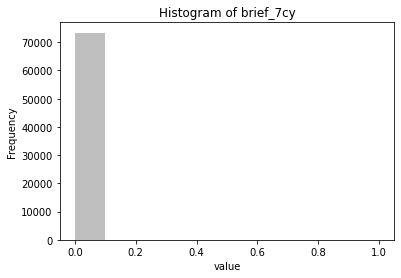

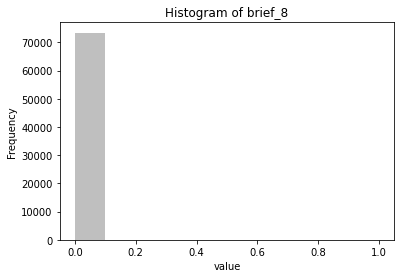

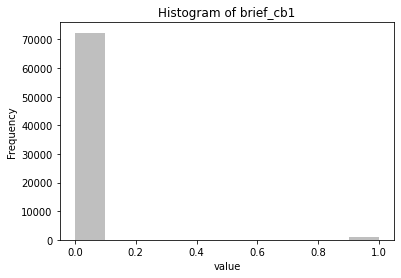

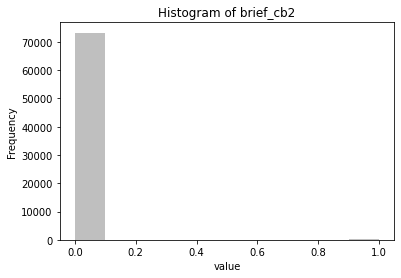

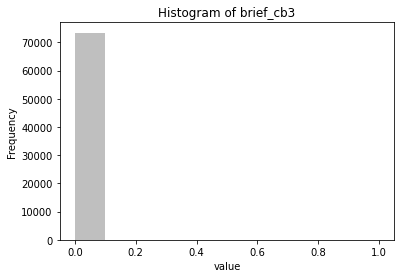

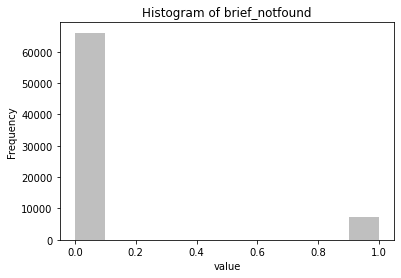

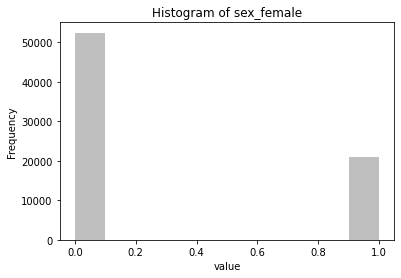

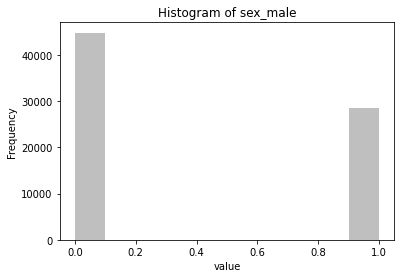

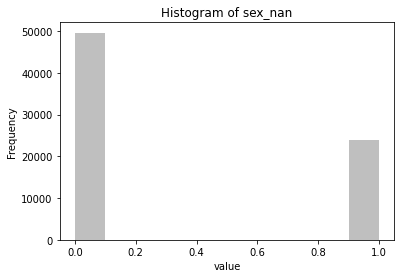

In [37]:
for col in df.columns:
    plot_histogram(df[col])

In [38]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [ ]:
df = add_interactions(df)

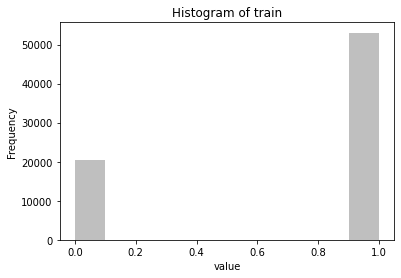

In [39]:
plot_histogram(df['train'])

# 3. Modelling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#Learning curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

import numpy as np # linear algebra
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import re 
from IPython.display import display_html
import itertools
import math
import random
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib

In [40]:
df = df.drop(columns=['id'], axis=1)

df_train = df[df['train'] == 1]
df_train = df.drop(['train',],axis=1)


df_test = df[df['train'] == 0]
df_test = df_test.drop(['label'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [41]:
X_train = df_train.drop(['label'], axis=1)
X_test = df_test
y_train = df_train['label']

In [44]:
#grid search
def GridSearchModel(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)

def Confuse(y, y_pred, classes):
    cnf_matrix = confusion_matrix(y, y_pred)
    
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis = 1)[:, np.newaxis]
    c_train = pd.DataFrame(cnf_matrix, index = classes, columns = classes)  

    ax = sns.heatmap(c_train, annot = True, square = True, cbar = False, 
                          fmt = '.2f', annot_kws = {"size": 20})
    return(ax, c_train)

# Learning curve
def LearningCurve(X, y, model, cv, train_sizes):

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = cv, n_jobs = 4, 
                                                            train_sizes = train_sizes)

    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std  = np.std(train_scores, axis = 1)
    test_scores_mean  = np.mean(test_scores, axis = 1)
    test_scores_std   = np.std(test_scores, axis = 1)
    
    train_Error_mean = np.mean(1- train_scores, axis = 1)
    train_Error_std  = np.std(1 - train_scores, axis = 1)
    test_Error_mean  = np.mean(1 - test_scores, axis = 1)
    test_Error_std   = np.std(1 - test_scores, axis = 1)

    Scores_mean = np.mean(train_scores_mean)
    Scores_std = np.mean(train_scores_std)
    
    _, y_pred, Accuracy, Error, precision, recall, f1score = ApplyModel(X, y, model)
    
    plt.figure(figsize = (16,4))
    plt.subplot(1,2,1)
    ax1 = Confuse(y, y_pred, classes)
    plt.subplot(1,2,2)
    plt.fill_between(train_sizes, train_Error_mean - train_Error_std,train_Error_mean + train_Error_std, alpha = 0.1,
                     color = "r")
    plt.fill_between(train_sizes, test_Error_mean - test_Error_std, test_Error_mean + test_Error_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_Error_mean, 'o-', color = "r",label = "Training Error")
    plt.plot(train_sizes, test_Error_mean, 'o-', color = "g",label = "Cross-validation Error")
    plt.legend(loc = "best")
    plt.grid(True)
     
    return (model, Scores_mean, Scores_std )

def ApplyModel(X, y, model):
    
    model.fit(X, y)
    y_pred  = model.predict(X)

    Accuracy = round(np.median(cross_val_score(model, X, y, cv = cv)),2)*100
 
    Error   = 1 - Accuracy
    
    precision = precision_score(y_train, y_pred) * 100
    recall = recall_score(y_train, y_pred) * 100
    f1score = f1_score(y_train, y_pred) * 100
    
    return (model, y_pred, Accuracy, Error, precision, recall, f1score)  
    

def PrintResults(model, X, y, title):
    
    model, y_pred, Accuracy, Error, precision, recall, f1score = ApplyModel(X, y, model)
    
    _, Score_mean, Score_std = LearningCurve(X, y, model, cv, train_size)
    Score_mean, Score_std = Score_mean*100, Score_std*100
    
    
    print('Scoring Accuracy: %.2f %%'%(Accuracy))
    print('Scoring Mean: %.2f %%'%(Score_mean))
    print('Scoring Standard Deviation: %.4f %%'%(Score_std))
    print("Precision: %.2f %%"%(precision))
    print("Recall: %.2f %%"%(recall))
    print('f1-score: %.2f %%'%(f1score))
    
    Summary = pd.DataFrame({'Model': title,
                       'Accuracy': Accuracy, 
                       'Score Mean': Score_mean, 
                       'Score St Dv': Score_std, 
                       'Precision': precision, 
                       'Recall': recall, 
                       'F1-Score': f1score}, index = [0])
    return (model, Summary)


classes = ["Good", "Bad"]
cv = ShuffleSplit(n_splits = 100, test_size = 0.25, random_state = 0)
train_size = np.linspace(.1, 1.0, 15)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Scoring Accuracy: 77.00 %
Scoring Mean: 77.43 %
Scoring Standard Deviation: 0.2394 %
Precision: 58.18 %
Recall: 4.53 %
f1-score: 8.41 %


AttributeError: ignored

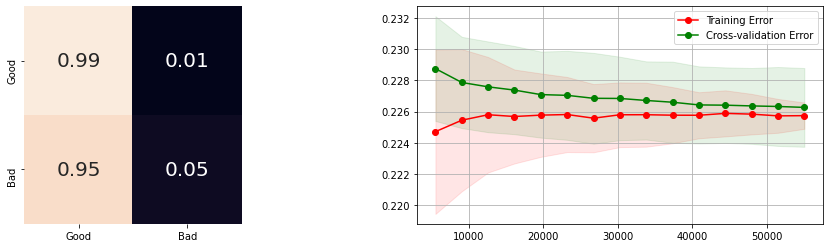

In [48]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 2)
_, Summary_XGBC = PrintResults(model, X_train,y_train,'XGBoost')
y_test_XGBC = pd.Series(model.predict(X_test), name = 'label')
print("oob score:", round(model.oob_score_, 4) * 100, "%")

Scoring Accuracy: 75.00 %
Scoring Mean: 88.61 %
Scoring Standard Deviation: 0.1928 %
Precision: 92.19 %
Recall: 54.01 %
f1-score: 68.12 %


AttributeError: ignored

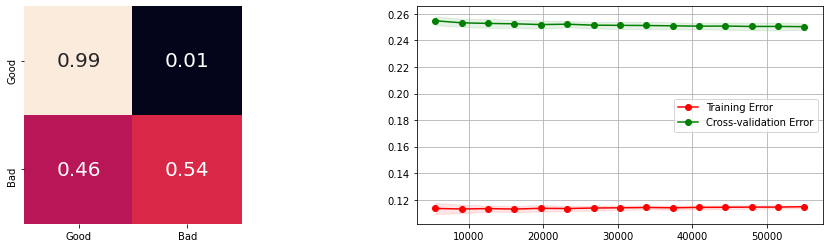

In [49]:
model = RandomForestClassifier(n_estimators = 2)
_, Summary_RF = PrintResults(model, X_train,y_train,'RF')
y_test_RF = pd.Series(model.predict(X_test), name = 'label')
print("oob score:", round(model.oob_score_, 4) * 100, "%")